Data Project: Powerlifting Exploration 

What are the most important variables when completing compound movements?

In [1]:
import pandas as pd
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.mlab as mlab


Information on the dataset:

It's permanent, accurate, convenient, accessible, open archive of the world's powerlifting data.

There are heaps of mini datasets categorized by each competition, location and time of comp.

World Raw Powerlifting Federation- Tasmania/ Aus

Why did I choose this dataset?

In [2]:
os.chdir(r'C:\Users\James\1161\PowerliftingExploration\openpowerlifting\meet-data\wrpf-aus')

In [3]:
df1 = pd.read_csv(r'C:\Users\James\1161\PowerliftingExploration\entries.csv')

In [4]:
dfaus = pd.read_csv(r'C:\Users\James\1161\PowerliftingExploration\openpowerlifting\meet-data\wrpf-aus\entries2.csv')

This is the forms of data that are collected during the Meets, there are 28 columns of data 

In [5]:
df1.columns

Index(['Place', 'Name', 'Sex', 'BirthDate', 'Age', 'Country', 'State',
       'Equipment', 'Division', 'BodyweightKg', 'WeightClassKg', 'Squat1Kg',
       'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg', 'Bench1Kg',
       'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Event',
       'Team'],
      dtype='object')

In [6]:
from re import M
df = df1
dfW = df1[df['Sex'].str.startswith('F')]

In [7]:
from re import M
df = df1
dfM = df1[df['Sex'].str.startswith('M')]

In [8]:
from re import M
df = dfaus
dfMAU = dfaus[df['Sex'].str.startswith('M')]

In [9]:
sd1 = df1.sort_values(by='BodyweightKg',ascending=True)

In [10]:
df1 = pd.read_csv(r'C:\Users\James\1161\PowerliftingExploration\entries.csv')


In [11]:
sdfM = dfM.sort_values(by='BodyweightKg',ascending=True)

In [12]:
sdfM2 = dfM.sort_values(by='Place',ascending=True)

In [13]:
sdfW = dfW.sort_values(by='BodyweightKg',ascending=True)

In [14]:
sdfW2 = dfW.sort_values(by='Place',ascending=True)

Firstly- Equipment

In [15]:
sdfM2.head(11)

,Place,Name,Sex,BirthDate,Age,Country,State,Equipment,Division,BodyweightKg,...,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Event,Team
39,1,Jacob Howard,M,1998-10-19,23.0,Australia,TAS,Wraps,MR-J,66.9,...,115.0,115.0,160.0,170.0,175.0,NaN,175.0,450.0,SBD,Iron Born SC
67,1,Peter Pike,M,1988-09-06,33.0,Australia,TAS,Wraps,MR-O,88.8,...,-160.0,155.0,275.0,292.5,301.0,NaN,301.0,726.0,SBD,Competitive Edge
71,1,Matto Vuceti,M,1990-04-07,32.0,Australia,TAS,Wraps,MR-O,98.9,...,165.0,165.0,250.0,260.0,265.0,NaN,265.0,700.0,SBD,Portside barbell/Limitless strength
107,1,Zac Seadon,M,2003-02-01,19.0,Australia,TAS,Raw,MR-SJ,98.4,...,NaN,NaN,260.0,285.0,300.0,NaN,300.0,300.0,D,Slaughterhouse Gym Launceston
78,1,Kayden Weller,M,1994-12-08,NaN,Australia,TAS,Wraps,MR-O,109.2,...,-162.5,157.5,282.5,305.0,320.0,NaN,320.0,787.5,SBD,Portside / Team Zerow
82,1,Nick Cross,M,1988-10-17,33.0,Australia,TAS,Wraps,MR-O,122.6,...,180.0,180.0,265.0,285.0,300.0,NaN,300.0,765.0,SBD,Portside Barbell
85,1,Carl Pearson,M,1984-03-20,38.0,Australia,TAS,Wraps,MR-O,133.4,...,175.0,175.0,245.0,-260.0,-262.5,NaN,245.0,665.0,SBD,Silverback Den
86,1,Mohinder Sidhu,M,1993-12-10,28.0,Australia,TAS,Wraps,MR-O,147.0,...,160.0,160.0,240.0,260.0,270.0,NaN,270.0,700.0,SBD,Home gym
87,1,Declan Dullaghan,M,2006-11-21,15.0,Australia,TAS,Wraps,MR-T,59.1,...,-70.0,67.5,130.0,142.5,-152.5,NaN,142.5,312.5,SBD,competitive edge / lift gym
88,1,Oliver Dean,M,2006-09-07,15.0,Australia,TAS,Wraps,MR-T,66.5,...,-102.5,100.0,-170.0,-190.0,190.0,-203.0,190.0,450.0,SBD,Competitive Edge


Take note of the clear indicator in the substantial difference equipment makes when performing the lifts

Womens Top 1 Placing Stats not taking into account bodyweight or division

In [16]:
sdfW2.head(11)

,Place,Name,Sex,BirthDate,Age,Country,State,Equipment,Division,BodyweightKg,...,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Event,Team
0,1,Indiana Love,F,2000-05-21,NaN,Australia,TAS,Wraps,FR-J,55.6,...,-47.5,45.0,85.0,-90.0,90.0,NaN,90.0,207.5,SBD,Competitive Edge
36,1,Tam Leitch,F,1984-04-05,38.0,Australia,TAS,Raw,FR-O,82.2,...,-70.0,65.0,NaN,NaN,NaN,NaN,NaN,65.0,B,Portside Barbell
35,1,Mackenzie Buck,F,2006-11-21,15.0,Australia,TAS,Raw,FR-T,74.7,...,42.5,42.5,87.5,95.0,100.0,NaN,100.0,142.5,BD,Method + Action
34,1,Kylie Green,F,1988-10-15,33.0,Australia,TAS,Raw,FR-O,87.5,...,42.5,42.5,80.0,87.5,100.0,NaN,100.0,142.5,BD,Iron Born SC
33,1,Sarah Francis,F,1997-04-29,25.0,Australia,TAS,Raw,FR-O,64.0,...,-60.0,55.0,120.0,127.5,130.0,NaN,130.0,185.0,BD,Modus Performance
32,1,Hollie Cullen,F,2009-07-23,12.0,Australia,TAS,Wraps,FR-Y,55.1,...,-35.0,30.0,85.0,95.0,-100.0,NaN,95.0,202.5,SBD,Competitive Edge
31,1,Sarah Hayes,F,2006-07-17,15.0,Australia,TAS,Wraps,FR-T,73.4,...,-50.0,45.0,125.0,132.5,140.5,-145.0,140.5,285.5,SBD,Competitive Edge
30,1,Kirsten Tatnell,F,NaN,27.0,Australia,TAS,Wraps,FR-O,100.8,...,-60.0,55.0,90.0,105.0,115.0,NaN,115.0,270.0,SBD,NaN
29,1,Emily Beswick,F,1989-05-24,NaN,Australia,TAS,Wraps,FR-O,81.5,...,-65.0,60.0,120.0,132.5,142.5,NaN,142.5,327.5,SBD,TSD
26,1,Ally Gruber,F,1997-10-31,24.0,Australia,TAS,Wraps,FR-O,68.1,...,100.0,100.0,182.5,192.5,200.0,NaN,200.0,477.5,SBD,Competitive Edge


Now comparing to Aus

In [17]:
dfMAU.head(11)

,Name,Age,Event,WeightClassKg,BodyweightKg,Sex,Equipment,Division,Squat1Kg,Squat2Kg,...,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Country
3,Ben Coleiro,23.0,SBD,75,73.50,M,Wraps,MR-O,110.0,120.0,...,77.5,-85.0,77.5,120.0,130.0,142.5,142.5,340.0,2,NaN
4,Peter Mansfield,53.0,SBD,75,70.30,M,Wraps,MR-O,120.0,130.0,...,-97.5,-97.5,90.0,120.0,140.0,-150.0,140.0,370.0,1,NaN
7,Jack Zelesco,20.0,SBD,82.5,79.70,M,Wraps,MR-O,120.0,130.0,...,85.0,90.0,90.0,180.0,190.0,200.0,200.0,430.0,4,NaN
8,Dan Smith,25.0,SBD,82.5,78.80,M,Wraps,MR-O,130.0,140.0,...,80.0,-90.0,80.0,180.0,-200.0,-200.0,180.0,400.0,5,NaN
9,Mitch Walker,23.0,SBD,67.5,66.30,M,Wraps,MR-O,125.0,132.5,...,110.0,-115.0,110.0,180.0,192.5,-202.5,192.5,445.0,1,NaN
10,Seth Taylor,17.0,SBD,82.5,80.35,M,Wraps,MR-O,160.0,170.0,...,-125.0,-125.0,117.5,180.0,195.0,-210.0,195.0,482.5,3,NaN
11,Matt Tyrell,19.0,SBD,82.5,80.80,M,Wraps,MR-O,180.0,190.0,...,-105.0,-105.0,95.0,200.0,210.0,-220.0,210.0,505.0,1,NaN
12,Brendan Lockett,27.0,SBD,82.5,80.60,M,Wraps,MR-O,155.0,165.0,...,105.0,-107.5,105.0,210.0,220.0,-230.0,220.0,490.0,2,NaN
13,Chris Barker,31.0,D,75,73.95,M,Raw,MR-O,NaN,NaN,...,NaN,NaN,NaN,200.0,222.5,-230.0,222.5,222.5,1,NaN
14,Jacob Rowlands,25.0,B,75,73.30,M,Raw,MR-O,NaN,NaN,...,130.0,135.0,135.0,NaN,NaN,NaN,NaN,135.0,1,NaN


This further reinforces the substiantial role equipment plays in reaching high overall weights in the comps

What about body weight?

Mens Top 1 Placing Stats not taking into account bodyweight or division

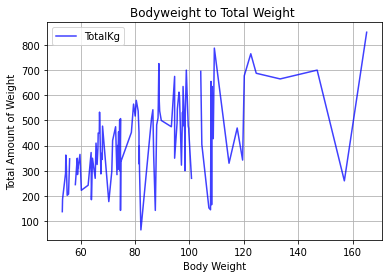

In [18]:
ax = sd1.plot("BodyweightKg", "TotalKg",grid = 100,color = "blue", alpha = 0.75)
ax.set_xlabel("Body Weight")
ax.set_ylabel("Total Amount of Weight")
ax.set_title("Bodyweight to Total Weight ")
ax.setgrid= ("True")

The total amount of weight is the three compound movements: benchpress, deadlift and squat combined.
Note the clear relationship between bodyweight and total amount of weight achieved.

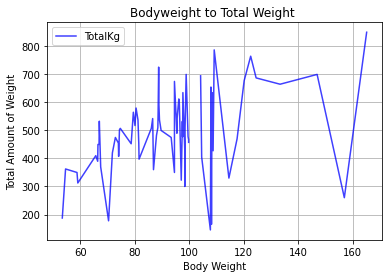

In [19]:
ax = sdfM.plot("BodyweightKg", "TotalKg",grid = 100,color = "blue", alpha = 0.75)
ax.set_xlabel("Body Weight")
ax.set_ylabel("Total Amount of Weight")
ax.set_title("Bodyweight to Total Weight ")
ax.setgrid= ("True")

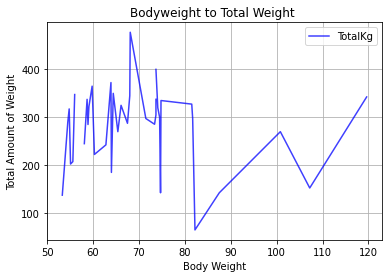

In [20]:
ax = sdfW.plot("BodyweightKg", "TotalKg",grid = 100,color = "blue", alpha = 0.75)
ax.set_xlabel("Body Weight")
ax.set_ylabel("Total Amount of Weight")
ax.set_title("Bodyweight to Total Weight ")
ax.setgrid= ("True")

Scatter Plot Style

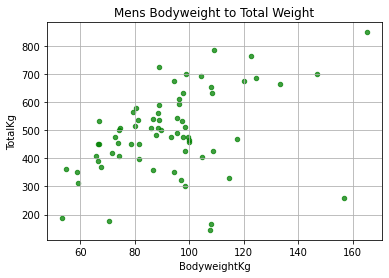

In [24]:
ax = dfM.plot(kind='scatter', x='BodyweightKg', y='TotalKg', color='green', alpha=0.75, grid=10,)
ax.set_title("Mens Bodyweight to Total Weight")
plt.show()

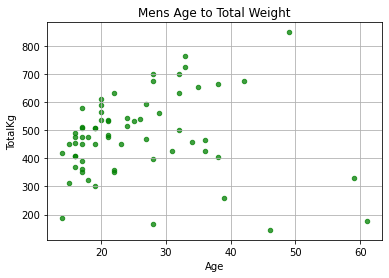

In [25]:
ax = dfM.plot(kind='scatter', x='Age', y='TotalKg', color='green', alpha=0.75, grid=10,)
ax.set_title("Mens Age to Total Weight")
plt.show()

This was an experiment, it didn't really work out :()

<AxesSubplot:ylabel='TotalKg'>

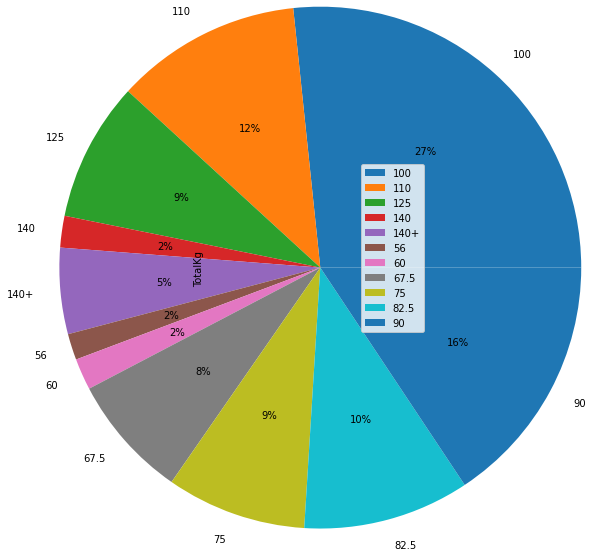

In [23]:
df = sdfM2
df.groupby(['WeightClassKg']).sum().plot(kind='pie', y='TotalKg',autopct='%1.0f%%', radius = 3)


What do I think is the most important variables to take into account when trying to increase your strength in the gym?

Weight

Equipment

Form

What else could you look into with this dataset?

Steroid use in correlation with worldwide strength levels